In [9]:
%run data_preperation.ipynb

In [44]:
import csv
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np

In [61]:
def convert_gender_to_binary(gender):
    if gender == 'w':
        return 1
    return 0

In [57]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [58]:
def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

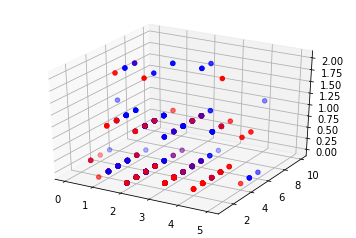

In [62]:
X = []
Y = []
Z = []
C = []

for i in range(1000):
    X.append(count_vocal(names[i][0]))
    Y.append(count_consonant(names[i][0]))
    Z.append(count_soft_consonant(names[i][0]))
    C.append(is_female(names[i][1]))
                
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(X, Y, Z, c=C);

In [63]:
def convert_name_to_features(name):
    return [
        count_vocal(name),
        count_consonant(name),
        count_soft_consonant(name),
        count_hard_consonant(name),
        last_letter_n(name),
        last_letter_a(name),
    ]

In [64]:
training_data = []
# create training dataset. where the last index is the value to be predicted
for name in names:
    name_features = convert_name_to_features(name[0])
    # append value to predict m/w)
    name_features.append(convert_gender_to_binary(name[1])) 
    training_data.append(name_features)

In [65]:
def hypothesis_multivariable_linear_regression(data_point, weights):
    z = 0
    for i in range(len(data_point)):
        z = z + weights[i] * data_point[i]
    # weights is one longer than features in data_point for bias unit
    z = z + weights[-1] # just add the bias unit weight
    return z

In [66]:
weights = []

for i in range(len(training_data[0])): # number of features + bias unit == training_data length
    #random weight initilization
    weights.append(np.random.uniform(low=i/10, high=i/10+0.1, size=1)[0])

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000


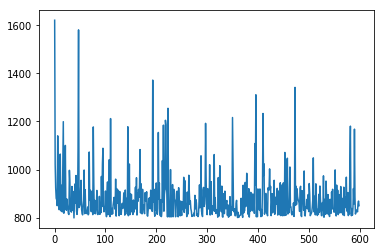

In [67]:
iterations = 60000
learning_rate = 0.1
costs = []


for i in range(iterations):
    # select random datapoint for training
    data_point = training_data[np.random.randint(len(training_data))]
    
    # [:-1] to cut out the value we want to predict
    z = hypothesis_multivariable_linear_regression(data_point[:-1], weights)

    prediction = sigmoid(z)
    target = data_point[-1]
    cost = np.square(prediction - target)
    
    if i % 100 == 0:
        c = 0
        for j in range(len(training_data)):
            track_z = hypothesis_multivariable_linear_regression(training_data[j][:-1], weights)            
            # add prediction - target to cost
            c += np.square(sigmoid(track_z) - training_data[j][-1])
        costs.append(c)
    
    if i % 5000 == 0 and i > 0:
        print(i)
    
    derivative_cost_prediction = learning_rate * 2 * (prediction - target) * sigmoid_p(z)
    
    for i in range(len(weights) - 1):
        weights[i] = weights[i] - derivative_cost_prediction * data_point[i]
    weights[-1] = weights[-1] - derivative_cost_prediction * 1 # bias weight
    
fig = plt.plot(costs)

In [43]:
mystery_name = convert_name_to_features('Anna')
z = hypothesis_multivariable_linear_regression(mystery_name, weights)
prediction = sigmoid(z)

print(prediction)

0.004299058998309259
